In [1]:
# pip install nba_api
# pip install pandas
# pip install requests

import pandas as pd
import requests
pd.set_option('display.max_columns', None)
import time
import numpy as np
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo

test_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2024-25&SeasonType=Regular%20Season&StatCategory=PTS'
# test_url = 'https://webws.365scores.com/web/game/?appTypeId=5&langId=9&timezoneName=America/Los_Angeles&userCountryId=323&gameId=4206653&matchupId=1317-1325-103&lastUpdateId=5032378761'
r = requests.get(url=test_url).json()

table_headers = r['resultSet']['headers']
# table_headers = r
pd.DataFrame(r['resultSet']['rowSet'], columns=table_headers)
r

{'resource': 'leagueleaders',
 'parameters': {'LeagueID': '00',
  'PerMode': 'Totals',
  'StatCategory': 'PTS',
  'Season': '2024-25',
  'SeasonType': 'Regular Season',
  'Scope': 'S',
  'ActiveFlag': None},
 'resultSet': {'name': 'LeagueLeaders',
  'headers': ['PLAYER_ID',
   'RANK',
   'PLAYER',
   'TEAM_ID',
   'TEAM',
   'GP',
   'MIN',
   'FGM',
   'FGA',
   'FG_PCT',
   'FG3M',
   'FG3A',
   'FG3_PCT',
   'FTM',
   'FTA',
   'FT_PCT',
   'OREB',
   'DREB',
   'REB',
   'AST',
   'STL',
   'BLK',
   'TOV',
   'PF',
   'PTS',
   'EFF',
   'AST_TOV',
   'STL_TOV'],
  'rowSet': [[1628983,
    1,
    'Shai Gilgeous-Alexander',
    1610612760,
    'OKC',
    27,
    935,
    288,
    567,
    0.508,
    57,
    170,
    0.335,
    184,
    212,
    0.868,
    22,
    126,
    148,
    167,
    53,
    27,
    72,
    57,
    817,
    833,
    2.32,
    0.74],
   [203507,
    2,
    'Giannis Antetokounmpo',
    1610612749,
    'MIL',
    24,
    840,
    307,
    501,
    0.613,
    4,


In [1]:
# Query nba.live.endpoints.scoreboard and  list games in localTimeZone
from datetime import datetime, timezone
from dateutil import parser
from nba_api.live.nba.endpoints import scoreboard

f = "{gameId}: {awayTeam} vs. {homeTeam} @ {gameTimeLTZ}" 

board = scoreboard.ScoreBoard()
print("ScoreBoardDate: " + board.score_board_date)
games = board.games.get_dict()
for game in games:
    gameTimeLTZ = parser.parse(game["gameTimeUTC"]).replace(tzinfo=timezone.utc).astimezone(tz=None)
    print(f.format(gameId=game['gameId'], awayTeam=game['awayTeam']['teamName'], homeTeam=game['homeTeam']['teamName'], gameTimeLTZ=gameTimeLTZ))

ScoreBoardDate: 2024-12-25
0022400405: Spurs vs. Knicks @ 2024-12-25 09:00:00-08:00
0022400406: Timberwolves vs. Mavericks @ 2024-12-25 11:30:00-08:00
0022400407: 76ers vs. Celtics @ 2024-12-25 14:00:00-08:00
0022400408: Lakers vs. Warriors @ 2024-12-25 17:00:00-08:00
0022400409: Nuggets vs. Suns @ 2024-12-25 19:30:00-08:00


In [1]:
# Query nba.live.endpoints for the score board of GameID 0022000180 = NYK vs BOS
# Simple PlayByPlay Loop demonstrating data usage
from nba_api.live.nba.endpoints import playbyplay
from nba_api.stats.static import players

# pbp = playbyplay.PlayByPlay('0022400383')
pbp = playbyplay.PlayByPlay('0022400397')
line = "{action_number}: {period}:{clock} {player_id} ({action_type})"
actions = pbp.get_dict()['game']['actions'] #plays are referred to in the live data as `actions`
for action in actions:
    player_name = ''
    player = players.find_player_by_id(action['personId'])
    if player is not None:
        player_name = player['full_name']
    print(line.format(action_number=action['actionNumber'],period=action['period'],clock=action['clock'],action_type=action['actionType'],player_id=player_name))

2: 1:PT12M00.00S  (period)
4: 1:PT11M57.00S Josh Hart (jumpball)
7: 1:PT11M37.00S Jalen Brunson (3pt)
8: 1:PT11M35.00S RJ Barrett (rebound)
9: 1:PT11M21.00S RJ Barrett (2pt)
11: 1:PT10M56.00S Jalen Brunson (turnover)
12: 1:PT10M31.00S Scottie Barnes (2pt)
13: 1:PT10M29.00S Karl-Anthony Towns (rebound)
14: 1:PT10M23.00S Mikal Bridges (3pt)
16: 1:PT10M13.00S Jonathan Mogbo (2pt)
18: 1:PT10M13.00S Karl-Anthony Towns (foul)
20: 1:PT10M13.00S Jonathan Mogbo (freethrow)
21: 1:PT09M55.00S Mikal Bridges (2pt)
22: 1:PT09M53.00S RJ Barrett (rebound)
23: 1:PT09M47.00S RJ Barrett (2pt)
24: 1:PT09M45.00S Karl-Anthony Towns (rebound)
25: 1:PT09M41.00S Jalen Brunson (2pt)
26: 1:PT09M39.00S Gradey Dick (rebound)
27: 1:PT09M28.00S Gradey Dick (2pt)
28: 1:PT09M26.00S Josh Hart (rebound)
29: 1:PT09M21.00S Ochai Agbaji (foul)
31: 1:PT09M21.00S Josh Hart (freethrow)
32: 1:PT09M21.00S Josh Hart (freethrow)
33: 1:PT08M58.00S Jonathan Mogbo (2pt)
34: 1:PT08M56.00S OG Anunoby (rebound)
35: 1:PT08M47.00S Karl-A

In [9]:
#playbyplay, shows shot distance

test_url = 'https://cdn.nba.com/static/json/liveData/playbyplay/playbyplay_0022400383.json'
r = requests.get(url=test_url).json()

r

{'meta': {'version': 1,
  'code': 200,
  'request': 'http://nba.cloud/games/0022400383/playbyplay?Format=json',
  'time': '2024-12-22 01:01:17.173518'},
 'game': {'gameId': '0022400383',
  'actions': [{'actionNumber': 2,
    'clock': 'PT12M00.00S',
    'timeActual': '2024-12-22T01:36:29.5Z',
    'period': 1,
    'periodType': 'REGULAR',
    'actionType': 'period',
    'subType': 'start',
    'qualifiers': [],
    'personId': 0,
    'x': None,
    'y': None,
    'possession': 0,
    'scoreHome': '0',
    'scoreAway': '0',
    'edited': '2024-12-22T01:36:29Z',
    'orderNumber': 20000,
    'isTargetScoreLastPeriod': False,
    'xLegacy': None,
    'yLegacy': None,
    'isFieldGoal': 0,
    'side': None,
    'description': 'Period Start',
    'personIdsFilter': []},
   {'actionNumber': 4,
    'clock': 'PT11M58.00S',
    'timeActual': '2024-12-22T01:36:31.0Z',
    'period': 1,
    'periodType': 'REGULAR',
    'teamId': 1610612744,
    'teamTricode': 'GSW',
    'actionType': 'jumpball',
   

In [3]:
import requests


# Fetch the JSON data
test_url = 'https://cdn.nba.com/static/json/liveData/playbyplay/playbyplay_0022400383.json'
data = requests.get(url=test_url).json()


# Filter actions for Trayce Jackson-Davis's shots
trayce_id = 1631218
trayce_shots = [
   {
       "clock": action["clock"],
       "x": action["x"],
       "y": action["y"],
       "shotDistance": action.get("shotDistance"),
       "area": action.get("area"),
       "shotResult": action.get("shotResult"),
       "pointsTotal": action.get("pointsTotal"),
   }
   for action in data["game"]["actions"]
   if action.get("personId") == trayce_id and action.get("isFieldGoal") == 1
]


trayce_shots


[{'clock': 'PT11M46.00S',
  'x': 8.886333771353483,
  'y': 52.94117647058824,
  'shotDistance': 3.43,
  'area': 'Restricted Area',
  'shotResult': 'Made',
  'pointsTotal': 2},
 {'clock': 'PT07M39.00S',
  'x': 6.783837056504599,
  'y': 56.372549019607845,
  'shotDistance': 3.38,
  'area': 'Restricted Area',
  'shotResult': 'Made',
  'pointsTotal': 4},
 {'clock': 'PT06M40.00S',
  'x': 6.915243101182654,
  'y': 49.01960784313725,
  'shotDistance': 1.34,
  'area': 'Restricted Area',
  'shotResult': 'Made',
  'pointsTotal': 6},
 {'clock': 'PT09M34.00S',
  'x': 91.27792378449409,
  'y': 56.127450980392155,
  'shotDistance': 4.25,
  'area': 'Restricted Area',
  'shotResult': 'Missed',
  'pointsTotal': None},
 {'clock': 'PT07M20.00S',
  'x': 93.64323258869908,
  'y': 48.03921568627451,
  'shotDistance': 1.22,
  'area': 'Restricted Area',
  'shotResult': 'Made',
  'pointsTotal': 9},
 {'clock': 'PT06M02.00S',
  'x': 91.67214191852825,
  'y': 44.11764705882353,
  'shotDistance': 3.91,
  'area': '

In [ ]:
import requests
import time
import json

# Constants
GAME_ID = "0022400383"  # Update this with the current game's ID
API_URL = f'https://cdn.nba.com/static/json/liveData/playbyplay/playbyplay_{GAME_ID}.json'
TRAYCE_ID = 1631218
JSON_FILE = "trayce_shots.json"

# Initialize local storage for shot attempts
try:
    with open(JSON_FILE, "r") as file:
        trayce_shots = json.load(file)
except FileNotFoundError:
    trayce_shots = []

# Function to fetch and filter Trayce Jackson-Davis's shots
def fetch_trayce_shots():
    try:
        data = requests.get(API_URL).json()
        new_shots = [
            {
                "clock": action["clock"],
                "x": action["x"],
                "y": action["y"],
                "shotDistance": action.get("shotDistance"),
                "area": action.get("area"),
                "shotResult": action.get("shotResult"),
                "pointsTotal": action.get("pointsTotal"),
            }
            for action in data["game"]["actions"]
            if action.get("personId") == TRAYCE_ID and action.get("isFieldGoal") == 1
        ]
        return new_shots
    except Exception as e:
        print(f"Error fetching data: {e}")
        return []

# Event listener loop
def listen_for_shots():
    global trayce_shots
    print("Listening for Trayce Jackson-Davis's shot attempts...")
    while True:
        new_shots = fetch_trayce_shots()
        for shot in new_shots:
            if shot not in trayce_shots:  # Avoid duplicates
                trayce_shots.append(shot)
                print(f"New shot detected: {shot}")
        # Save updated shots to the JSON file
        with open(JSON_FILE, "w") as file:
            json.dump(trayce_shots, file, indent=4)
        time.sleep(5)  # Poll every 5 seconds (adjust as needed)

# Start the event listener
listen_for_shots()


Listening for Trayce Jackson-Davis's shot attempts...


KeyboardInterrupt: 

In [1]:
import requests
import time
import json
from datetime import datetime, timezone
from dateutil import parser
from nba_api.live.nba.endpoints import scoreboard

# Constants
SPURS_TEAM_NAME = "Spurs"  # Team to monitor
JSON_FILE = "all_shots.json"

# Helper function to get the game ID for the specified team
def get_game_id(team_name):
    board = scoreboard.ScoreBoard()
    games = board.games.get_dict()
    for game in games:
        if team_name in (game['homeTeam']['teamName'], game['awayTeam']['teamName']):
            return game['gameId']
    return None

# Fetch game ID dynamically for the Spurs game
GAME_ID = get_game_id(SPURS_TEAM_NAME)
if not GAME_ID:
    raise ValueError(f"Game involving {SPURS_TEAM_NAME} not found.")

API_URL = f'https://cdn.nba.com/static/json/liveData/playbyplay/playbyplay_{GAME_ID}.json'

# Initialize local storage for shot attempts
try:
    with open(JSON_FILE, "r") as file:
        all_shots = json.load(file)
except FileNotFoundError:
    all_shots = []

# Function to fetch and filter all shot attempts
def fetch_all_shots():
    try:
        data = requests.get(API_URL).json()
        new_shots = [
            {
                "playerId": action.get("personId"),
                "clock": action["clock"],
                "x": action["x"],
                "y": action["y"],
                "shotDistance": action.get("shotDistance"),
                "area": action.get("area"),
                "shotResult": action.get("shotResult"),
                "pointsTotal": action.get("pointsTotal"),
                "teamId": action.get("teamId"),
            }
            for action in data["game"]["actions"]
            if action.get("isFieldGoal") == 1  # Field goal attempt
        ]
        return new_shots
    except Exception as e:
        print(f"Error fetching data: {e}")
        return []

# Event listener loop
def listen_for_shots():
    global all_shots
    print(f"Listening for all shot attempts in the {SPURS_TEAM_NAME} game...")
    while True:
        new_shots = fetch_all_shots()
        for shot in new_shots:
            if shot not in all_shots:  # Avoid duplicates
                all_shots.append(shot)
                print(f"New shot detected: {shot}")
        # Save updated shots to the JSON file
        with open(JSON_FILE, "w") as file:
            json.dump(all_shots, file, indent=4)
        time.sleep(2)  # Poll every 2 seconds for faster updates

# Start the event listener
listen_for_shots()


ValueError: Game involving Spurs not found.

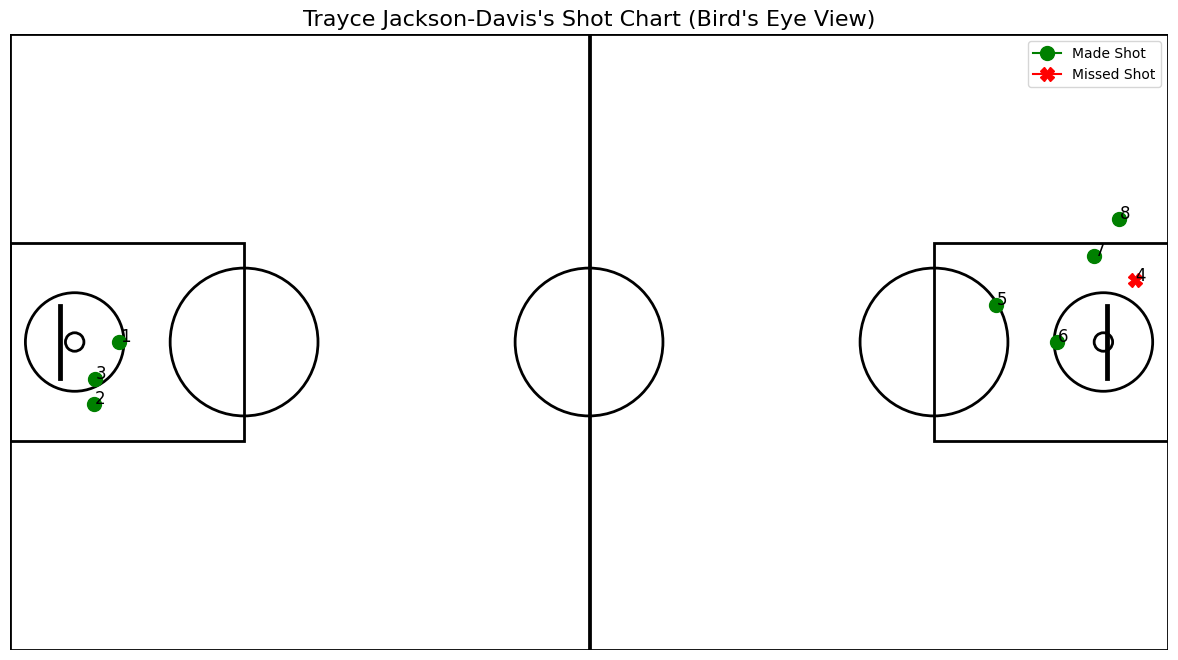

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


# Function to draw a basketball court (bird's eye view, full court)
def draw_full_court(ax=None, color='black', lw=2):
   if ax is None:
       ax = plt.gca()


   # Court outline
   court = patches.Rectangle((0, 0), 94, 50, linewidth=lw, color=color, fill=False)


   # Hoops
   left_hoop = patches.Circle((5.25, 25), radius=0.75, linewidth=lw, color=color, fill=False)
   right_hoop = patches.Circle((88.75, 25), radius=0.75, linewidth=lw, color=color, fill=False)


   # Backboards
   left_backboard = patches.Rectangle((4, 22), 0.1, 6, linewidth=lw, color=color)
   right_backboard = patches.Rectangle((89, 22), 0.1, 6, linewidth=lw, color=color)


   # Paint areas
   left_paint = patches.Rectangle((0, 17), 19, 16, linewidth=lw, color=color, fill=False)
   right_paint = patches.Rectangle((75, 17), 19, 16, linewidth=lw, color=color, fill=False)


   # Free throw circles
   left_free_throw = patches.Circle((19, 25), radius=6, linewidth=lw, color=color, fill=False)
   right_free_throw = patches.Circle((75, 25), radius=6, linewidth=lw, color=color, fill=False)


   # Restricted areas
   left_restricted = patches.Circle((5.25, 25), radius=4, linewidth=lw, color=color, fill=False)
   right_restricted = patches.Circle((88.75, 25), radius=4, linewidth=lw, color=color, fill=False)


   # Half court line and center circle
   half_court_line = patches.Rectangle((47, 0), 0.1, 50, linewidth=lw, color=color)
   center_circle = patches.Circle((47, 25), radius=6, linewidth=lw, color=color, fill=False)


   # Adding all elements to the court
   court_elements = [
       court, left_hoop, right_hoop, left_backboard, right_backboard,
       left_paint, right_paint, left_free_throw, right_free_throw,
       left_restricted, right_restricted, half_court_line, center_circle
   ]
   for element in court_elements:
       ax.add_patch(element)


   # Set limits and aspect ratio
   ax.set_xlim(0, 94)
   ax.set_ylim(0, 50)
   ax.set_aspect('equal')
   ax.axis('off')


   return ax


# Trayce's shots with corrected coordinates (right side adjustments)
trayce_shots = [
   {'clock': 'PT11M46.00S', 'x': 8.886, 'y': 25.0, 'shotResult': 'Made'},  # Left side
   {'clock': 'PT07M39.00S', 'x': 6.784, 'y': 20.0, 'shotResult': 'Made'},  # Left side
   {'clock': 'PT06M40.00S', 'x': 6.915, 'y': 22.0, 'shotResult': 'Made'},  # Left side
   {'clock': 'PT09M34.00S', 'x': 91.278, 'y': 30.0, 'shotResult': 'Missed'},  # Right side
   {'clock': 'PT07M20.00S', 'x': 80.0, 'y': 28.0, 'shotResult': 'Made'},  # Right side (adjusted x)
   {'clock': 'PT06M02.00S', 'x': 85.0, 'y': 25.0, 'shotResult': 'Made'},  # Right side (adjusted x)
   {'clock': 'PT05M27.00S', 'x': 88.0, 'y': 32.0, 'shotResult': 'Made'},  # Right side (adjusted x)
   {'clock': 'PT04M55.00S', 'x': 90.0, 'y': 35.0, 'shotResult': 'Made'}   # Right side (adjusted x)
]


# Plot the court and the shots
fig, ax = plt.subplots(figsize=(16, 8))
draw_full_court(ax)


# Plot each shot and label with numbers
for idx, shot in enumerate(trayce_shots, start=1):
   if shot['shotResult'] == 'Made':
       ax.plot(shot['x'], shot['y'], marker='o', markersize=10, color='green', label='Made Shot')
   else:
       ax.plot(shot['x'], shot['y'], marker='X', markersize=10, color='red', label='Missed Shot')
  
   # Add shot number label with black text
   ax.text(shot['x'] + 0.5, shot['y'], str(idx), fontsize=12, ha='center', color='black')


# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')


# Add title
plt.title("Trayce Jackson-Davis's Shot Chart (Bird's Eye View)", fontsize=16)


plt.show()

Listening for all shot attempts in the Spurs game...
New shot detected: {'playerId': 1628384, 'clock': 'PT04M56.00S', 'x': 91.27792378449409, 'y': 97.54901960784314, 'shotDistance': 23.95, 'area': 'Right Corner 3', 'shotResult': 'Made', 'pointsTotal': 8, 'teamId': 1610612752}


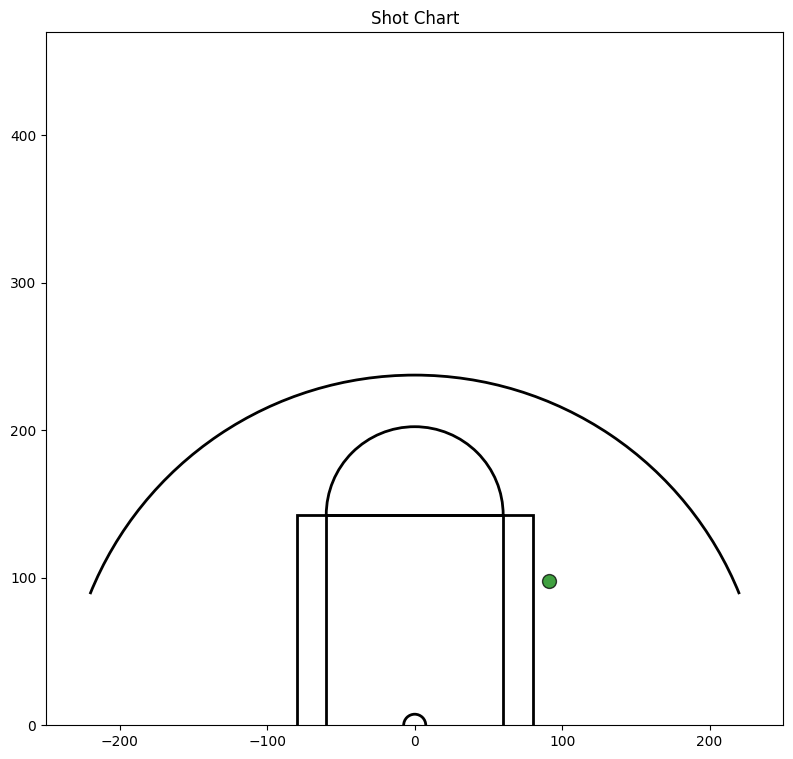

New shot detected: {'playerId': 101108, 'clock': 'PT04M39.00S', 'x': 15.062417871222076, 'y': 27.696078431372552, 'shotDistance': 14.27, 'area': 'Mid-Range', 'shotResult': 'Made', 'pointsTotal': 8, 'teamId': 1610612759}


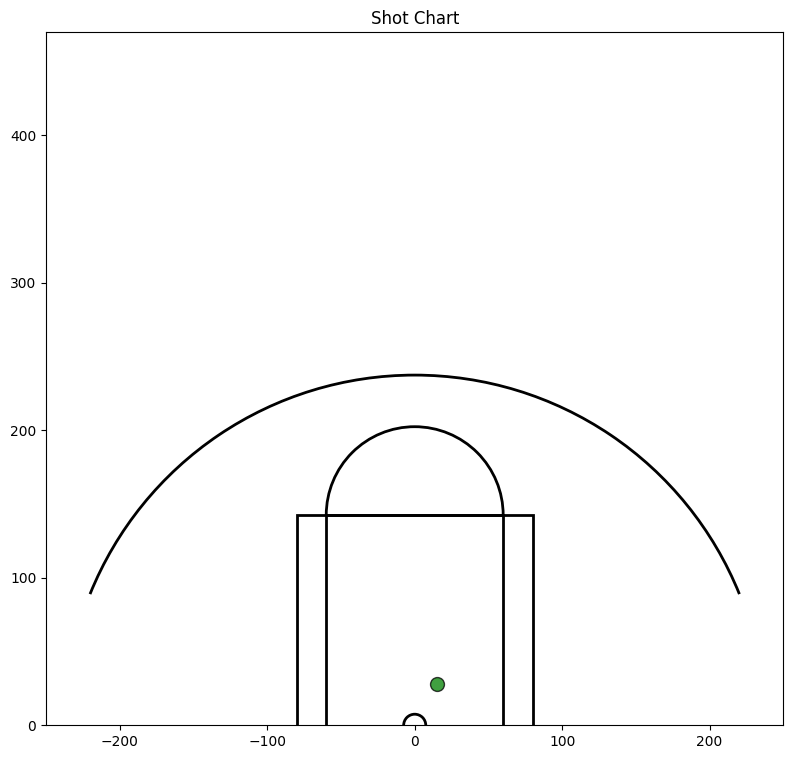

New shot detected: {'playerId': 1630173, 'clock': 'PT04M20.00S', 'x': 94.43166885676742, 'y': 48.28431372549019, 'shotDistance': 0.86, 'area': 'Restricted Area', 'shotResult': 'Made', 'pointsTotal': 5, 'teamId': 1610612752}


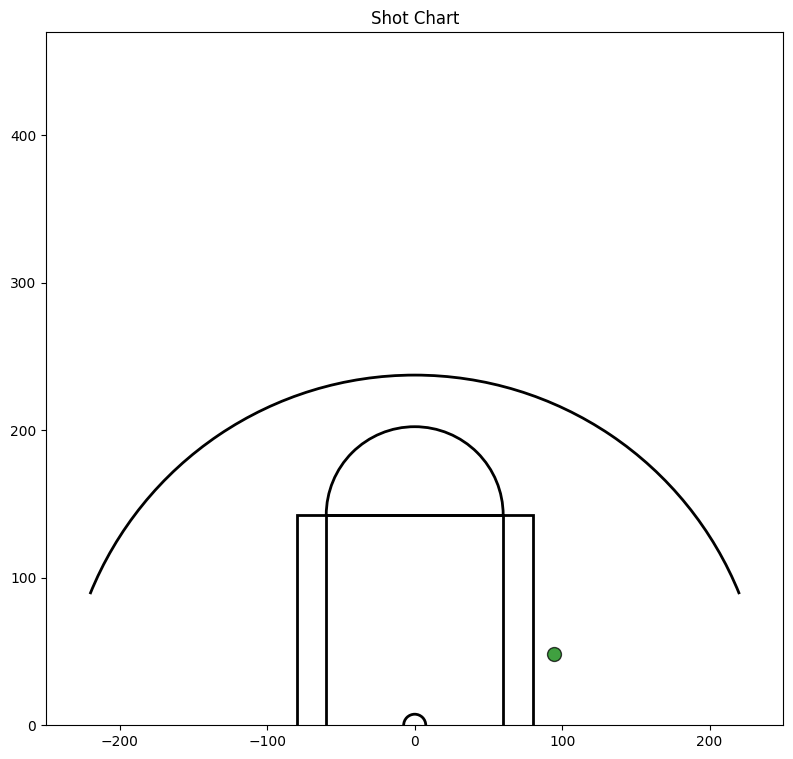

New shot detected: {'playerId': 1631110, 'clock': 'PT04M10.00S', 'x': 5.995400788436268, 'y': 50.98039215686274, 'shotDistance': 0.63, 'area': 'Restricted Area', 'shotResult': 'Made', 'pointsTotal': 18, 'teamId': 1610612759}


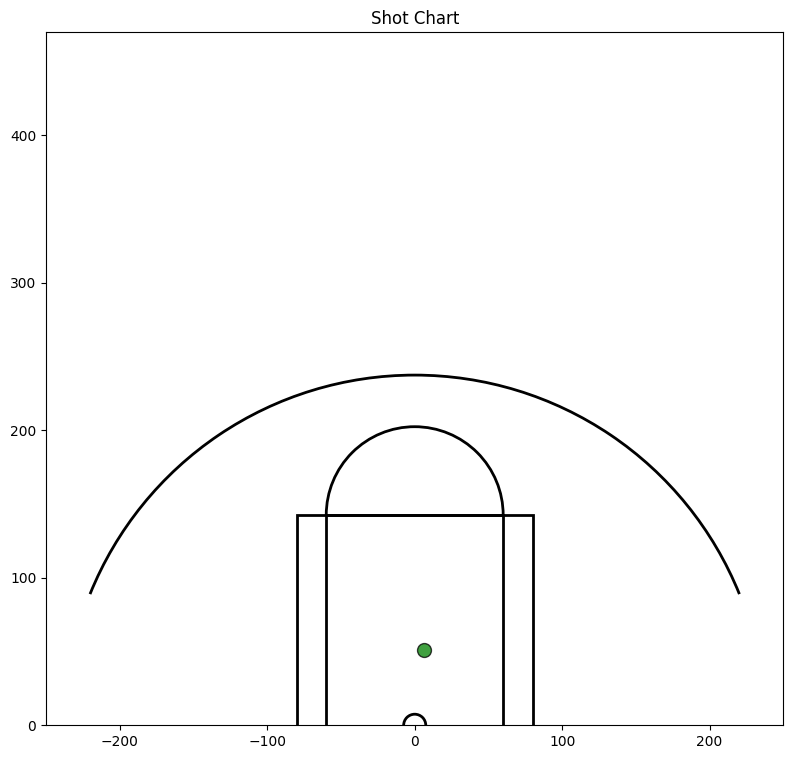

New shot detected: {'playerId': 1628969, 'clock': 'PT03M51.00S', 'x': 78.66294349540078, 'y': 43.627450980392155, 'shotDistance': 15.15, 'area': 'Mid-Range', 'shotResult': 'Made', 'pointsTotal': 37, 'teamId': 1610612752}


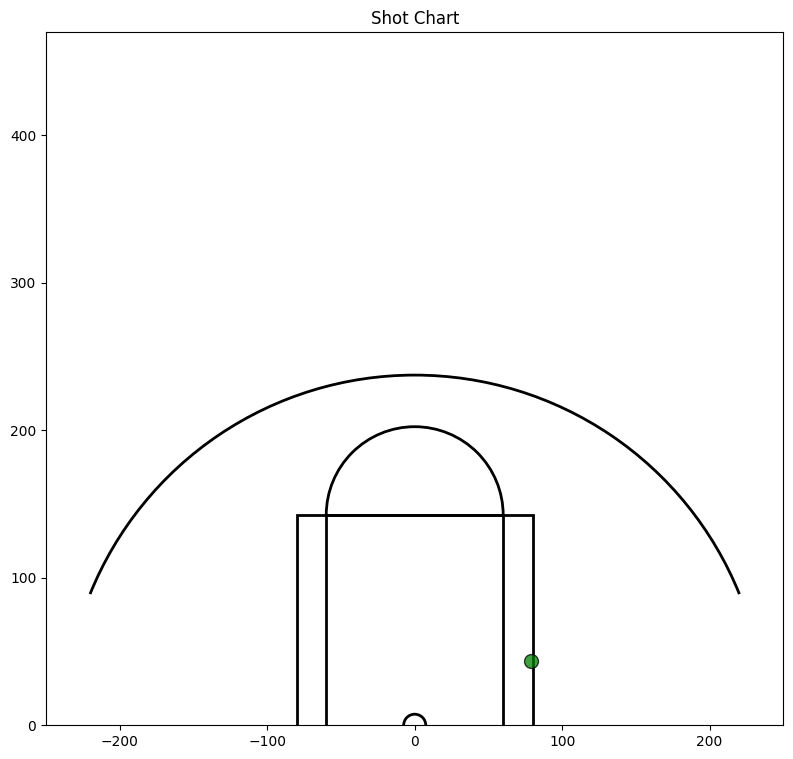

New shot detected: {'playerId': 1641705, 'clock': 'PT03M36.00S', 'x': 32.933639947437584, 'y': 22.794117647058822, 'shotDistance': 29.09, 'area': 'Above the Break 3', 'shotResult': 'Missed', 'pointsTotal': None, 'teamId': 1610612759}


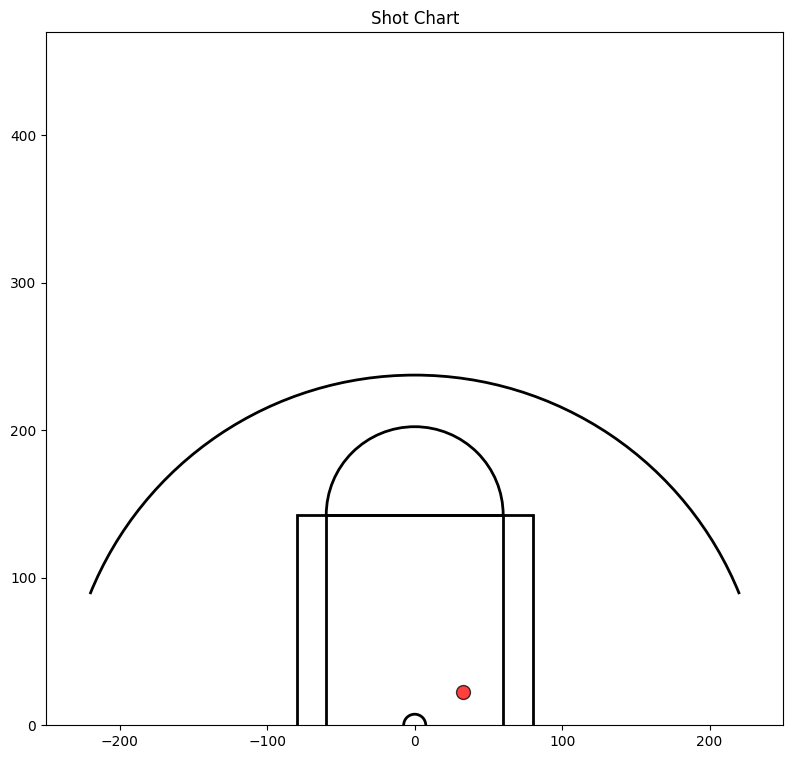

New shot detected: {'playerId': 1628969, 'clock': 'PT03M22.00S', 'x': 82.21090670170827, 'y': 33.57843137254902, 'shotDistance': 14.11, 'area': 'Mid-Range', 'shotResult': 'Missed', 'pointsTotal': None, 'teamId': 1610612752}


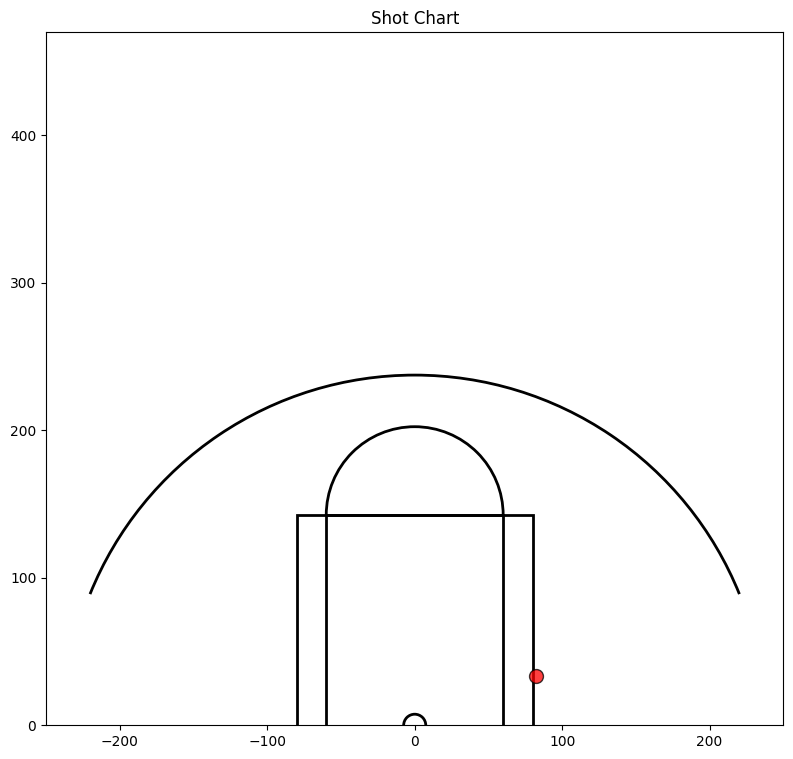

New shot detected: {'playerId': 1628404, 'clock': 'PT03M18.00S', 'x': 94.40999984741211, 'y': 50.0, 'shotDistance': 0.0, 'area': 'Restricted Area', 'shotResult': 'Made', 'pointsTotal': 11, 'teamId': 1610612752}


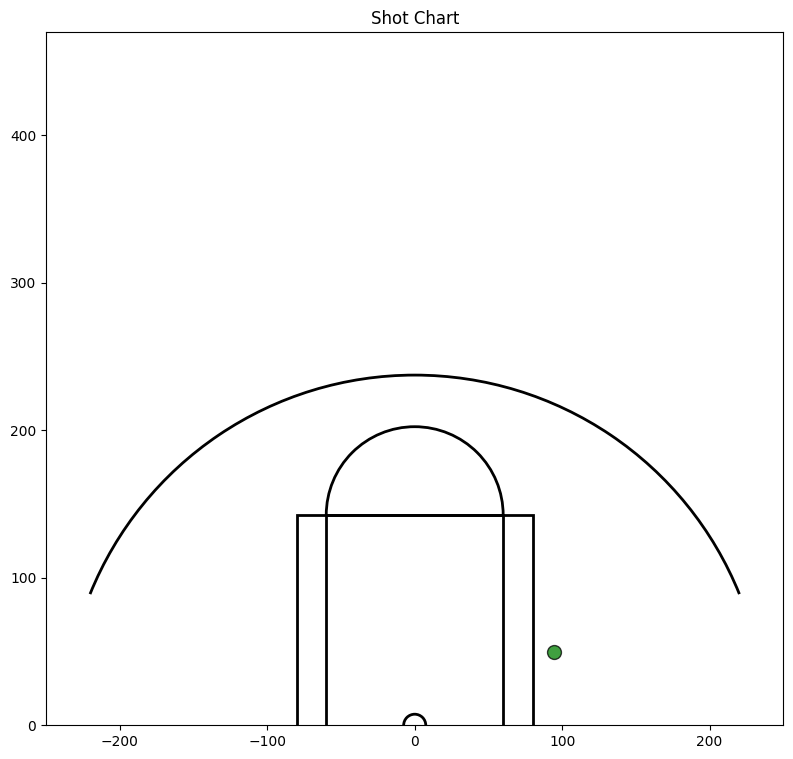

New shot detected: {'playerId': 1631110, 'clock': 'PT03M04.00S', 'x': 26.888961892247043, 'y': 79.65686274509804, 'shotDistance': 24.92, 'area': 'Above the Break 3', 'shotResult': 'Made', 'pointsTotal': 21, 'teamId': 1610612759}


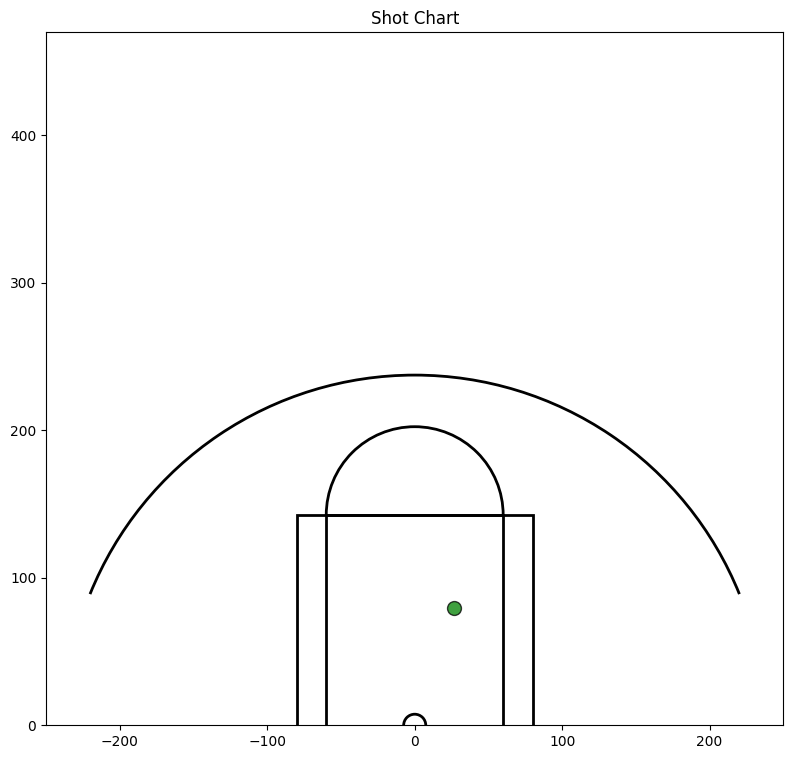

New shot detected: {'playerId': 1630540, 'clock': 'PT02M43.00S', 'x': 69.99014454664915, 'y': 27.941176470588236, 'shotDistance': 25.47, 'area': 'Above the Break 3', 'shotResult': 'Made', 'pointsTotal': 8, 'teamId': 1610612752}


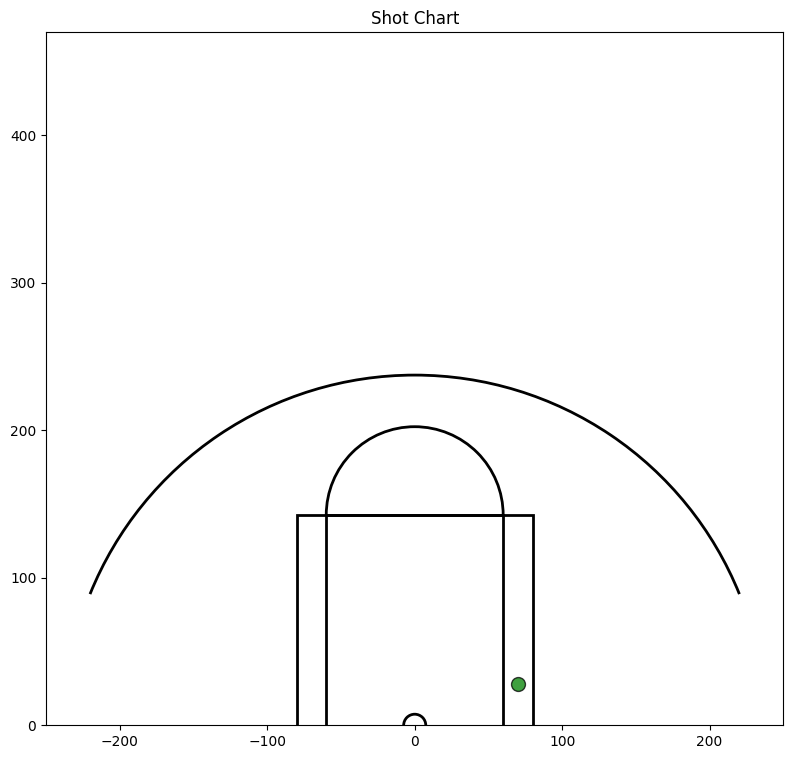

New shot detected: {'playerId': 1628969, 'clock': 'PT02M25.00S', 'x': 92.46057818659659, 'y': 53.18627450980392, 'shotDistance': 2.43, 'area': 'Restricted Area', 'shotResult': 'Missed', 'pointsTotal': None, 'teamId': 1610612752}


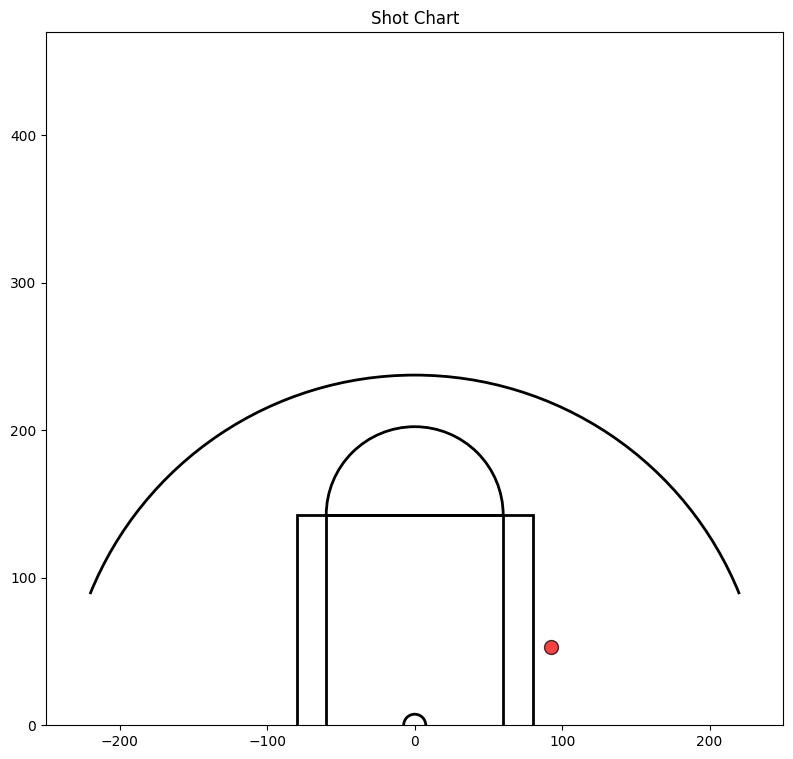

KeyboardInterrupt: 

In [4]:
import requests
import time
import json
from datetime import datetime, timezone
from dateutil import parser
from nba_api.live.nba.endpoints import scoreboard
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

# Constants
SPURS_TEAM_NAME = "Spurs"  # Team to monitor
JSON_FILE = "all_shots.json"

# Helper function to get the game ID for the specified team
def get_game_id(team_name):
    board = scoreboard.ScoreBoard()
    games = board.games.get_dict()
    for game in games:
        if team_name in (game['homeTeam']['teamName'], game['awayTeam']['teamName']):
            return game['gameId']
    return None

# Fetch game ID dynamically for the Spurs game
GAME_ID = get_game_id(SPURS_TEAM_NAME)
if not GAME_ID:
    raise ValueError(f"Game involving {SPURS_TEAM_NAME} not found.")

API_URL = f'https://cdn.nba.com/static/json/liveData/playbyplay/playbyplay_{GAME_ID}.json'

# Initialize local storage for shot attempts
try:
    with open(JSON_FILE, "r") as file:
        all_shots = json.load(file)
except FileNotFoundError:
    all_shots = []

# Function to fetch and filter all shot attempts
def fetch_all_shots():
    try:
        data = requests.get(API_URL).json()
        new_shots = [
            {
                "playerId": action.get("personId"),
                "clock": action["clock"],
                "x": action["x"],
                "y": action["y"],
                "shotDistance": action.get("shotDistance"),
                "area": action.get("area"),
                "shotResult": action.get("shotResult"),
                "pointsTotal": action.get("pointsTotal"),
                "teamId": action.get("teamId"),
            }
            for action in data["game"]["actions"]
            if action.get("isFieldGoal") == 1  # Field goal attempt
        ]
        return new_shots
    except Exception as e:
        print(f"Error fetching data: {e}")
        return []

# Function to draw an NBA basketball court
def draw_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # Draw the court
    # Hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # Paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

    # Free throw circle
    free_throw_circle = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)

    # 3-point line
    three_point_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color, fill=False)

    # Add elements to the axes
    ax.add_patch(hoop)
    ax.add_patch(backboard)
    ax.add_patch(outer_box)
    ax.add_patch(inner_box)
    ax.add_patch(free_throw_circle)
    ax.add_patch(three_point_arc)

    # Half court line
    half_court = Arc((0, 422.5), 40, 40, theta1=0, theta2=360, linewidth=lw, color=color)

    # Set the axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    ax.set_aspect('equal')

# Function to plot shot attempts
def plot_shots(shots):
    fig, ax = plt.subplots(figsize=(10, 9))
    draw_court(ax)
    for shot in shots:
        x = shot['x']  # X-coordinate of the shot
        y = shot['y']  # Y-coordinate of the shot
        result = shot['shotResult']
        color = 'green' if result == "Made" else 'red'  # Green for made, red for missed
        ax.scatter(x, y, c=color, s=100, label=result, edgecolors='black', alpha=0.75)
    plt.title("Shot Chart")
    plt.show()

# Event listener loop
def listen_for_shots():
    global all_shots
    print(f"Listening for all shot attempts in the {SPURS_TEAM_NAME} game...")
    while True:
        new_shots = fetch_all_shots()
        for shot in new_shots:
            if shot not in all_shots:  # Avoid duplicates
                all_shots.append(shot)
                print(f"New shot detected: {shot}")
                plot_shots([shot])  # Plot the new shot in real-time
        # Save updated shots to the JSON file
        with open(JSON_FILE, "w") as file:
            json.dump(all_shots, file, indent=4)
        time.sleep(2)  # Poll every 2 seconds for faster updates

# Start the event listener
listen_for_shots()
